In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler
import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from epri_mc_lib import *


# Import data

In [300]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,Absorption_avg_100,Absorption_std_100,Absorption_avg_200,Absorption_std_200,median_CF,median_perm,median_MBN,median_CF_g,median_perm_g,median_pMBN_g
T_B1,12.947951,0.073112,0.000234,0.000018,0.0175,0.0042,0.001264,0.000519,4.410000e-13,4.090000e-07,...,0.000682,0.000193,0.000373,0.000094,1.1000,68.50,0.4730,NaN,NaN,NaN
T_B2,12.920068,0.077814,0.000571,0.000139,0.0240,0.0057,0.002486,0.000816,1.520000e-06,1.510000e-06,...,0.001069,0.000365,0.000874,0.000234,1.1095,66.45,0.6305,NaN,NaN,NaN
T_B3,12.932865,0.088762,0.000244,0.000030,0.0134,0.0028,0.001168,0.000555,4.270000e-13,5.640000e-07,...,0.000658,0.000246,0.000349,0.000078,1.0795,68.40,0.5765,NaN,NaN,NaN
T_B4,10.763517,0.071173,0.000379,0.000100,0.0146,0.0031,0.002084,0.000648,7.580000e-07,1.000000e-06,...,0.000921,0.000223,0.000701,0.000136,4.5140,32.90,0.5005,NaN,NaN,NaN
T_B5,12.942958,0.074808,0.000230,0.000033,0.0182,0.0040,0.001141,0.000447,3.970000e-13,4.670000e-07,...,0.000571,0.000113,0.000397,0.000088,1.4290,64.95,0.5380,NaN,NaN,NaN


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, T_B1 to P_N
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TEP_mean_uV_C       24 non-null     float64
 1   TEP_error_uV_C      24 non-null     float64
 2   Absorption_avg_500  16 non-null     float64
 3   Absorption_std_500  16 non-null     float64
 4   backscatter_avg     24 non-null     float64
 5   backscatter_std     16 non-null     float64
 6   Absorption_avg_50   24 non-null     float64
 7   Absorption_std_50   24 non-null     float64
 8   A                   24 non-null     float64
 9   A std               24 non-null     float64
 10  B                   24 non-null     float64
 11  B std               24 non-null     float64
 12  p                   24 non-null     float64
 13  p std               24 non-null     float64
 14  Absorption_avg_100  24 non-null     float64
 15  Absorption_std_100  24 non-null     float64
 16  Absorption_

## Selecting sub samples

In [313]:
#select pipe and tube without Nan
pipe = df.copy().iloc[16:]
pipe.dropna(how='all', axis=1, inplace=True)

tube = df.copy().iloc[:16]
tube.dropna(how='all', axis=1, inplace=True)

tube_wo_blind = df.copy().iloc[8:16]
tube_wo_blind.dropna(how='all', axis=1, inplace=True)

tube_blind = df.copy().iloc[:]
tube_blind.dropna(how='all', axis=1, inplace=True)


## Scaling values

In [314]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#if need reapply selecting sub samples with scaler

In [315]:
def plot_corr(data):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(15, 15))
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0)


In [316]:
def plot_heatmap_rel(df):
    sns.set_theme(style="whitegrid")
    corr_mat = df.corr().stack().reset_index(name="correlation")
    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(50, 250), size_norm=(-1, 1)
    )
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")


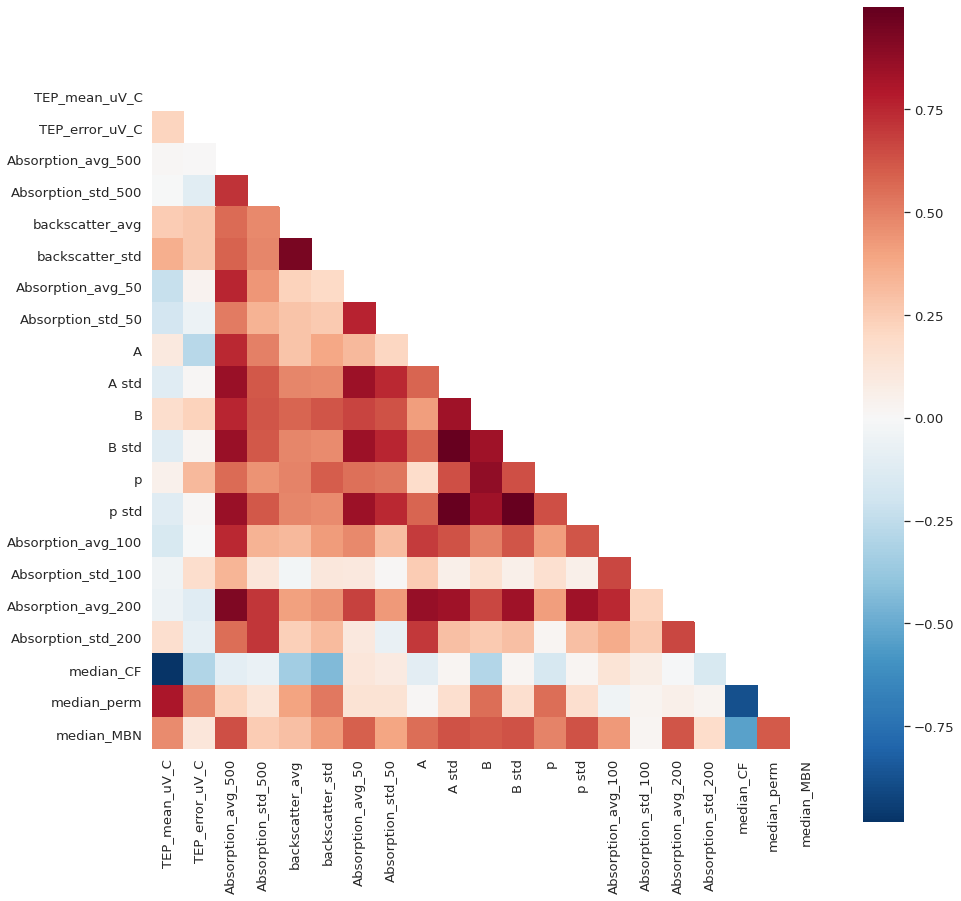

In [317]:
plot_corr(tube)

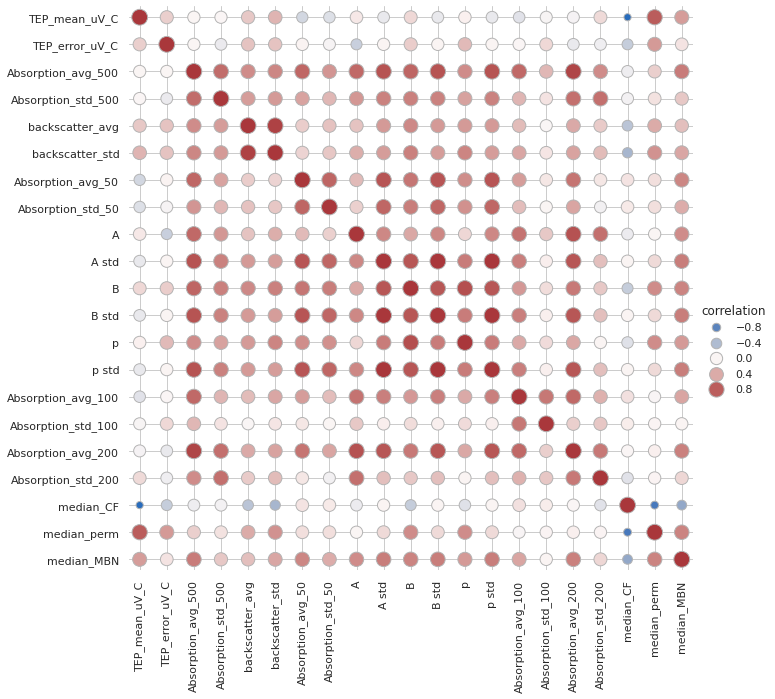

In [318]:
plot_heatmap_rel(tube)

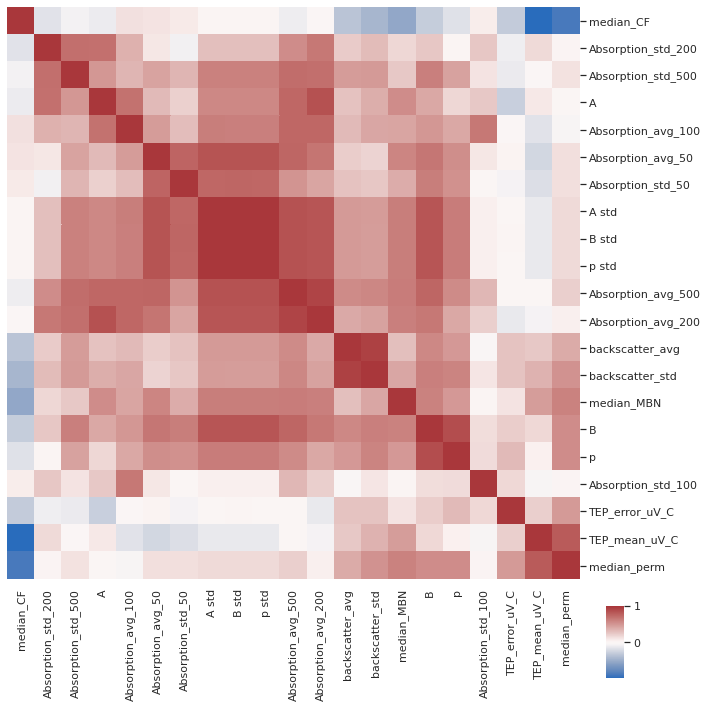

In [319]:
sns.clustermap(tube.corr(), center=0, cmap="vlag", dendrogram_ratio=(0.000001, 0.000001), cbar_pos=(0.85, 0.05, 0.025, 0.1))

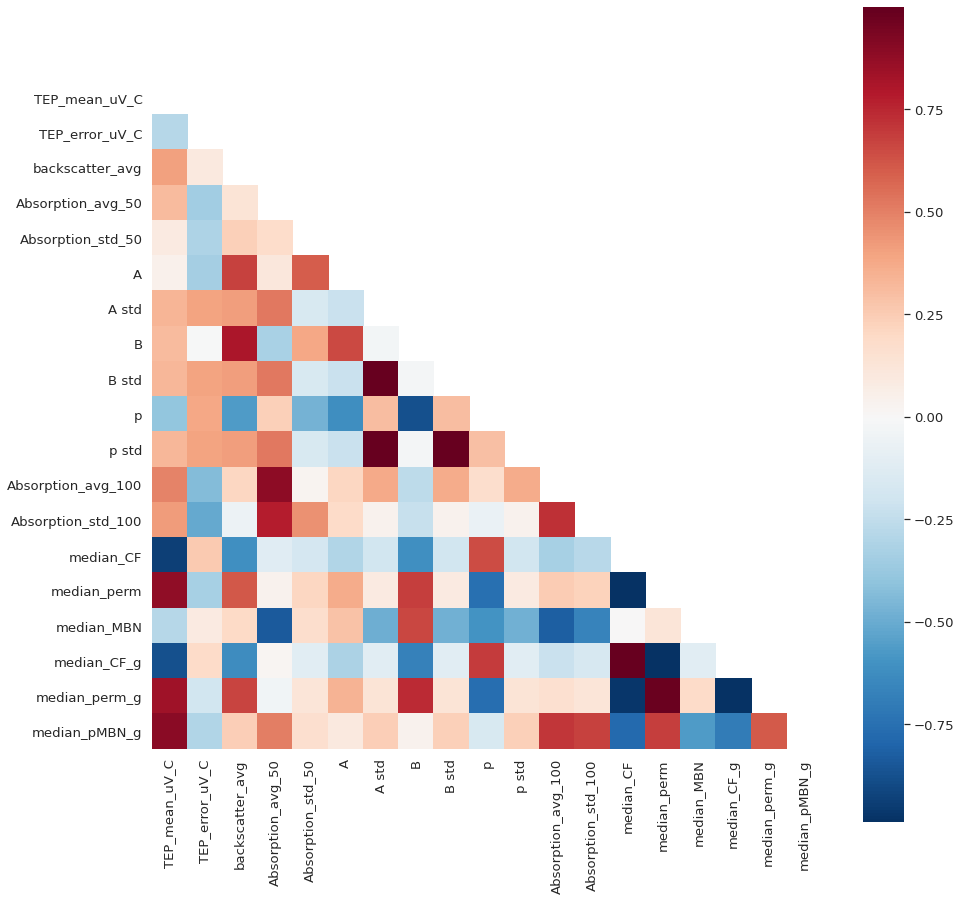

In [321]:
plot_corr(pipe)

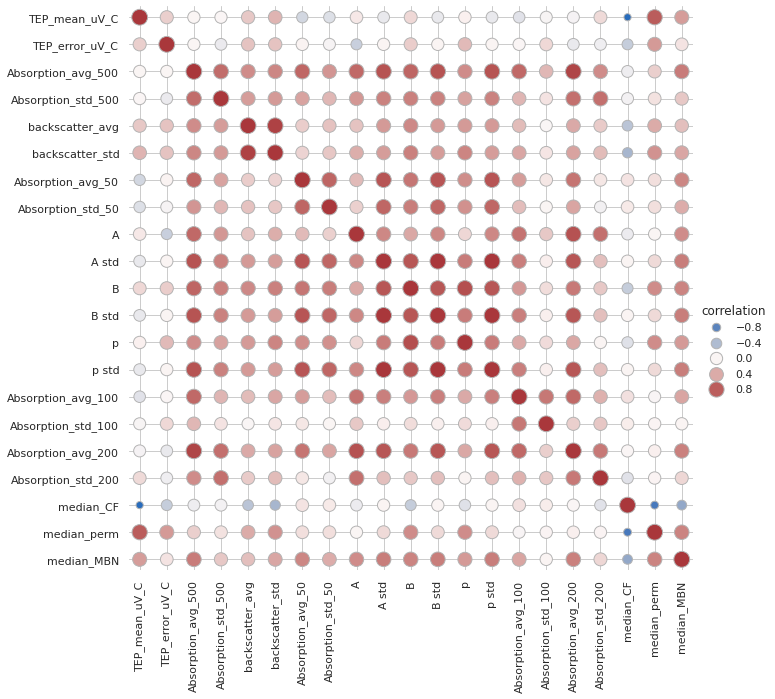

In [322]:
plot_heatmap_rel(tube)

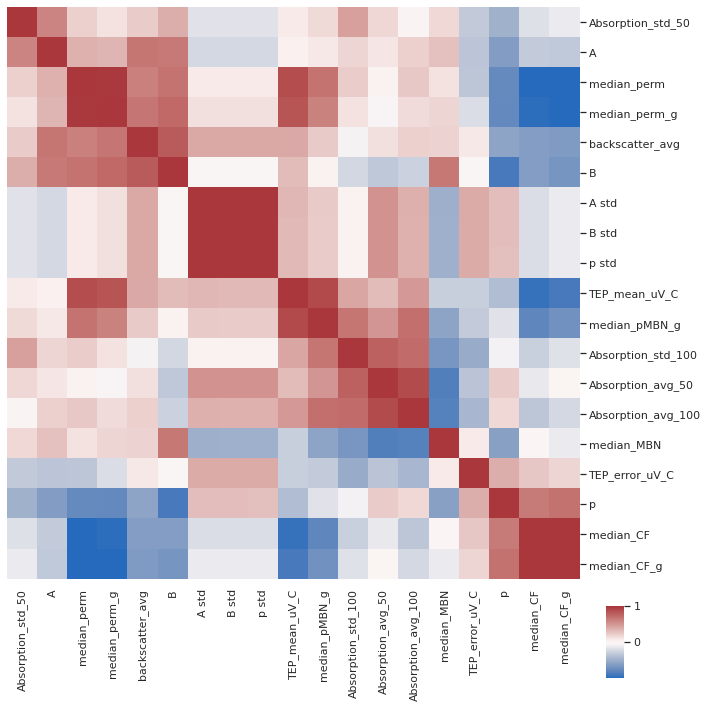

In [324]:
sns.clustermap(pipe.corr(), center=0, cmap="vlag", dendrogram_ratio=(0.000001, 0.000001), cbar_pos=(0.85, 0.05, 0.025, 0.1))

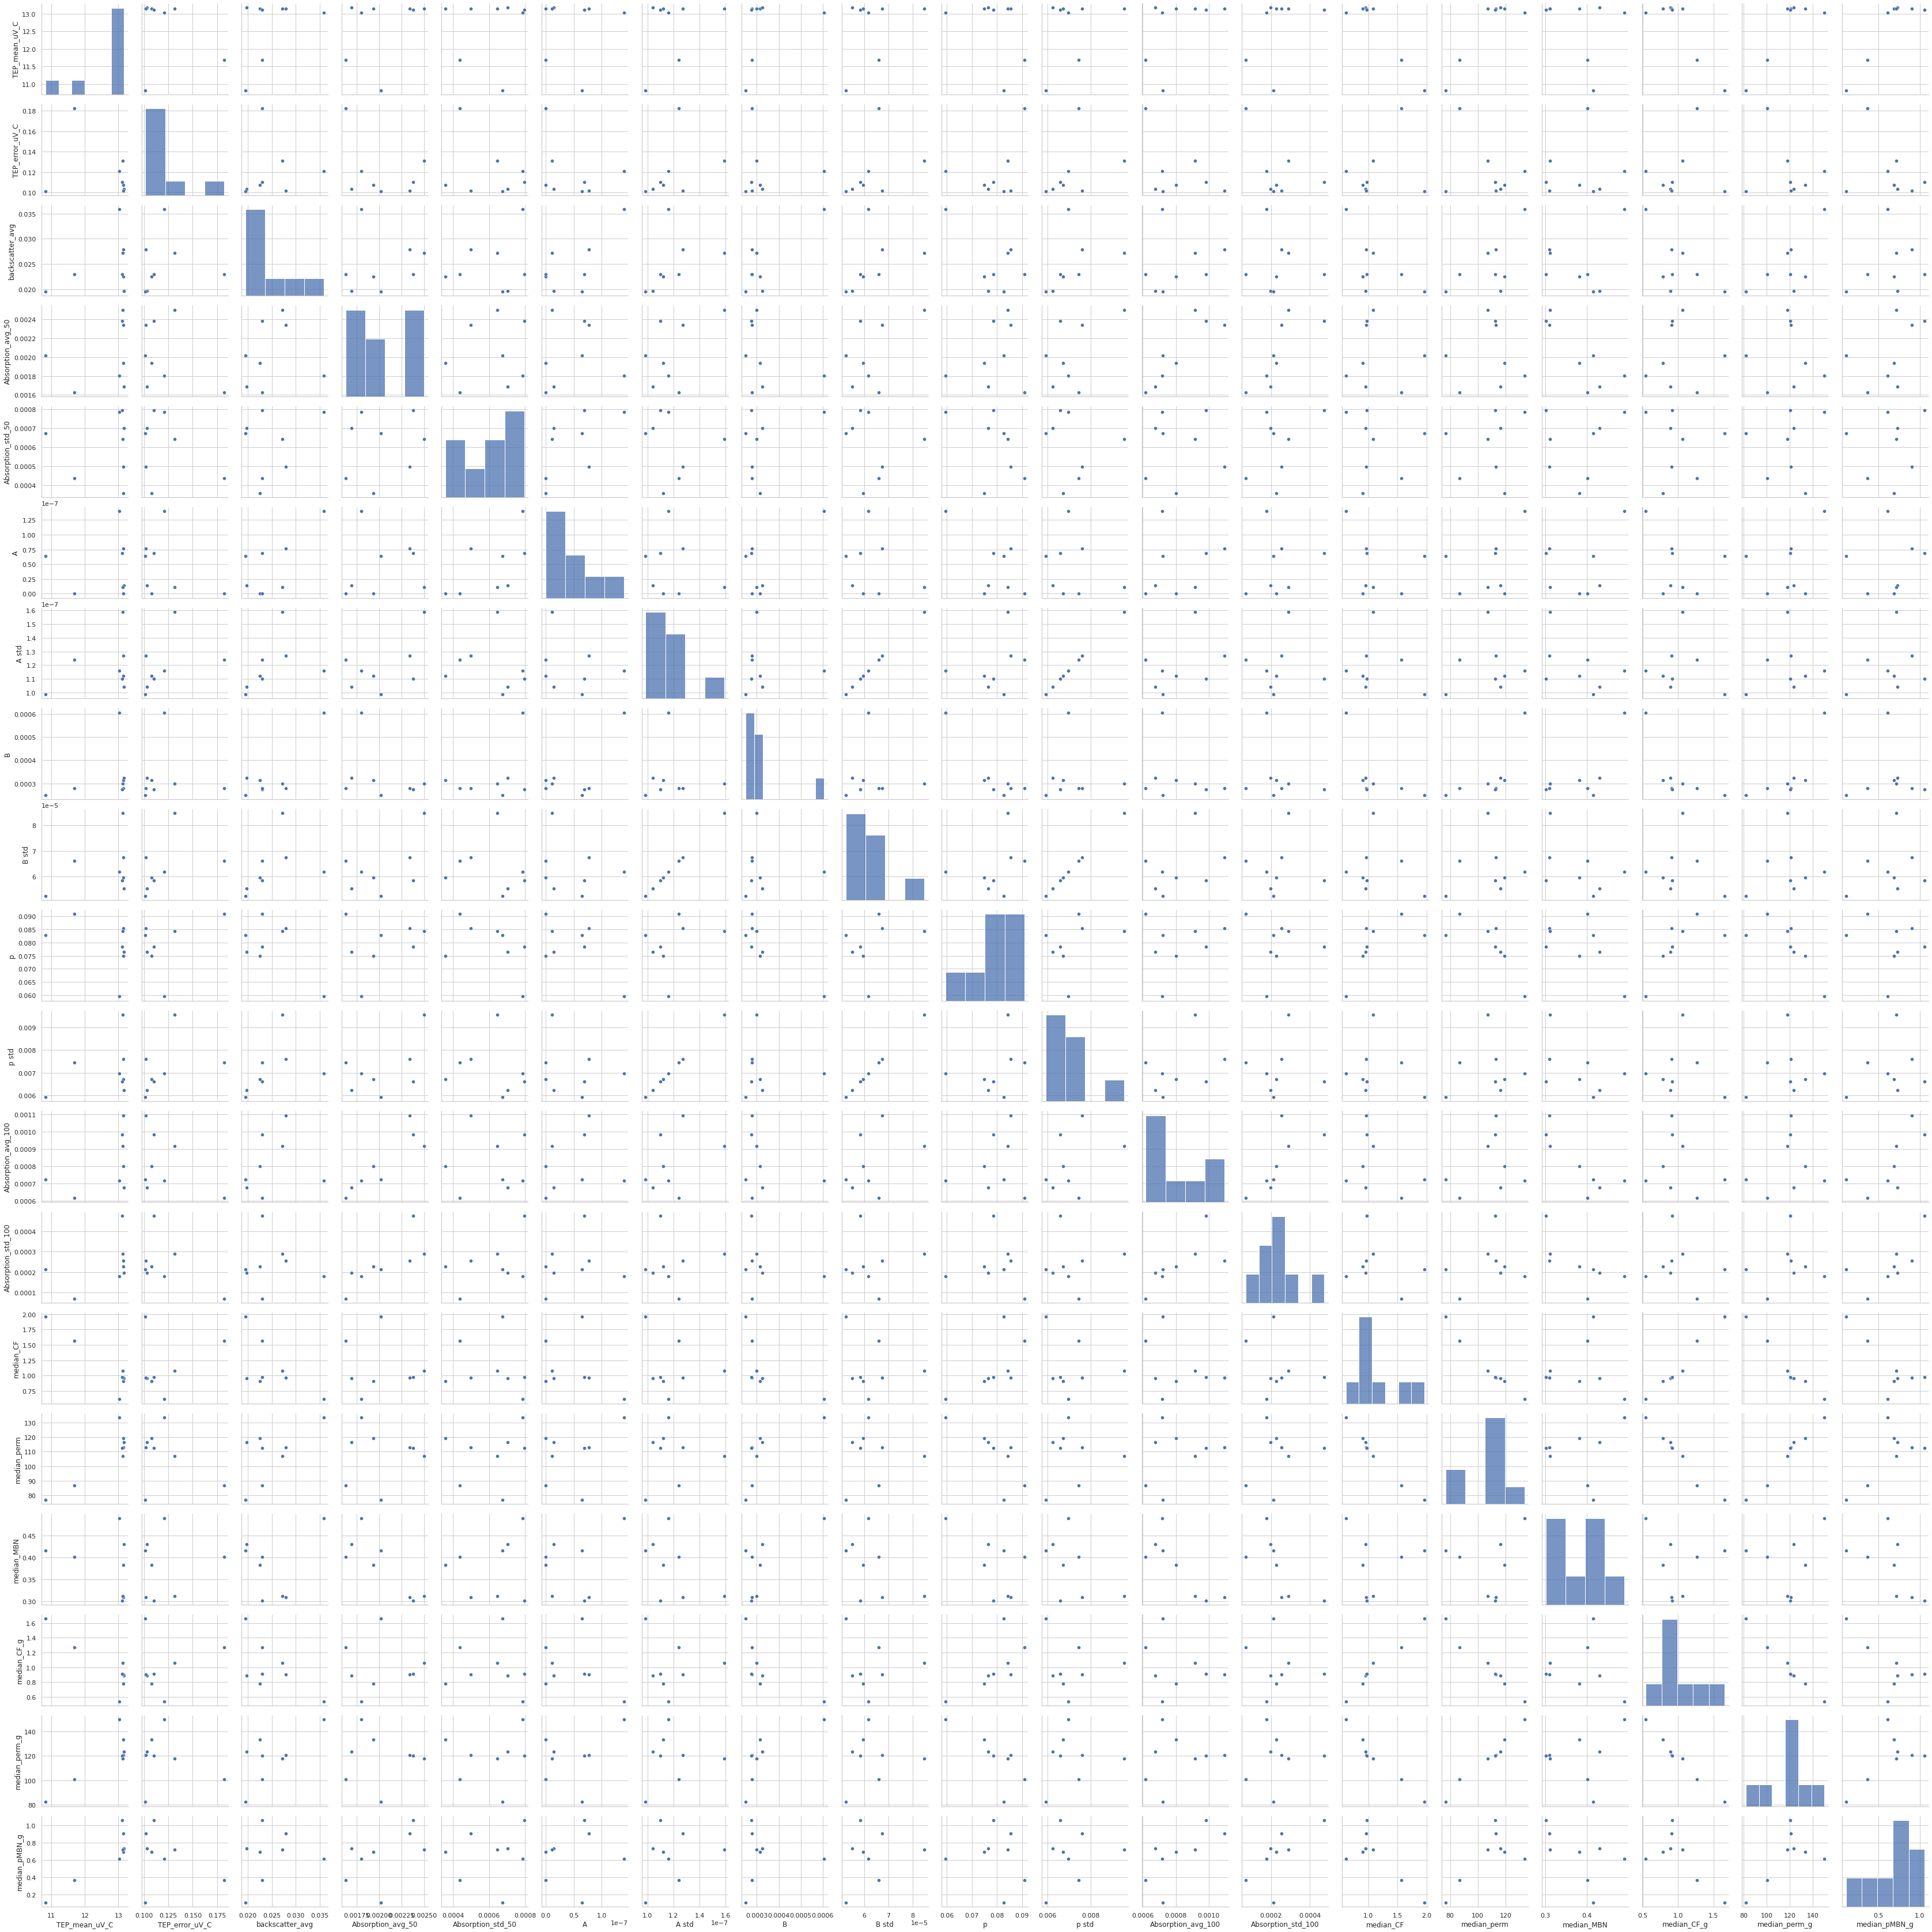

In [323]:
sns.pairplot(pipe)